In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import chi2
from factor_analyzer.factor_analyzer import calculate_kmo

**Factor Analysis**  
Factor analysis finds unobserved variables. For example, variance in 10 observed variables can mainly reflect the variation in 2 unobserved variables.  
  
***PCA vs. Factor Analysis***  
PCA explains variance, FA explains covariance.  
PCA is a dimension reduction method while factor analysis is a latent variable method.  
The PCA component is a linear combination of the observed variable, in FA the observed variables are linear combinations of the underlying factors.  
PCA components cannot be interpreted. FA the underlying factors can be labeled and interpreted.

In [2]:
df = pd.read_csv('C:\\Users\\thesk\\eclipse-workspace\\bfi.csv') 
## As the most typical latent factors example for learning purposes we choose Big 5 personality test
## dataset from https://vincentarelbundock.github.io/Rdatasets/datasets.html
## Keys: A agree	C conscientious	E extraversion	N neuroticism	O openness

In [3]:
df.shape

(2800, 29)

In [4]:
df.head(3)

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17


In [5]:
df.drop(['rownames','gender', 'education', 'age'],axis=1,inplace=True)  ## drop demographics from Big 5 scales

In [6]:
df.dropna(inplace=True)  ## drop rows with missing values
df.shape

(2436, 25)

In [7]:
## df['education'].fillna((df['education'].mean()), inplace=True)  ## Alternatively, fill missing values with column mean
## df['education'] = df['education'].astype('int64')   ## Need to cast datatype df['education'] = and convert float to int for Bartlett/KMO

In [8]:
## Don't need to encode categorical variables in this dataset, already integer
## le = preprocessing.LabelEncoder()
## df['gender'] = le.fit_transform(df['gender'])
## df['education'] = le.fit_transform(df['education'])


  **STEPS INVOLVED IN FACTOR ANALYSIS**  
•	Bartlett’s Test of Sphericity and KMO Test  
•	Determining the number of factors  
•	Interpreting the factors

**Bartlett’s test of Sphericity**  
The Bartlett’s test of Sphericity is used to test the null hypothesis that the correlation matrix is an identity matrix = variables are not correlated and therefore not ideal for factor analysis. A significant statistical test shows that the correlation matrix is not an identity matrix and correlation is present among the variables (rejection of the null hypothesis).  
**KMO**  
KMO measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables.

Simply pass the ‘dataset’ through the calculate_bartltett_sphericty function, it will test the null hypothesis and will return the chi-squared value and the p test statistic. Since the p test statistic is less than 0.05, we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.  
KMO = 85% of variance might be a common variance among the variables.

In [9]:
bs = calculate_bartlett_sphericity(df)
kmo = calculate_kmo(df)
bs,kmo

((18170.96635086924, 0.0),
 (array([0.75391928, 0.8363196 , 0.87010963, 0.87795367, 0.90348747,
         0.84325413, 0.79568263, 0.85186857, 0.82647206, 0.86401687,
         0.83801873, 0.88380544, 0.89697008, 0.87731273, 0.89332158,
         0.77933902, 0.78025018, 0.86229919, 0.88518467, 0.86014155,
         0.85858672, 0.78019798, 0.84434957, 0.77003158, 0.76144469]),
  0.848539722194922))

**What is the right number of factors?**  
Eigenvalue is useful to determine how many factors we will need.  
 Normally, we use eigenvalue of 1 or higher to determine if the factor is useful.  
Then scree plotshows visuallye how many factors we will be using.
  
Eigenvalues show the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1. Why? In a standard normal distribution with mean 0 and sd 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues (variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.  
Here 6 eigenvalues are bigger than 1 so we can choose 6 factors.

In [10]:
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=df.shape[1])  ## df.shape gives total rowsxcolumns, df.shape[1] gives total columns
fa.fit(df)
ev,_ = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

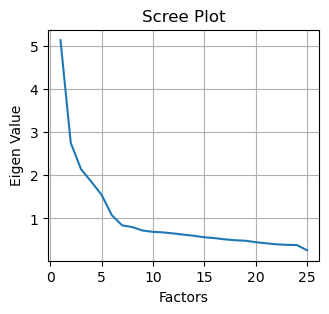

In [11]:
plt.figure(figsize=(3.5,3))
plt.plot(range(1,df.shape[1]+1),ev) ## +1 as x and y must have same first dimension, but will have shapes (25,) and (26,)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [12]:
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=6)
fa.fit(df)
ev,_ = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [13]:
pd.DataFrame(fa.loadings_, 
             columns = ['Factor 1','Factor 2','Factor 3','Factor 4','Factor 5','Factor 6'], 
             index = [df.columns])
## The factor loading is the correlation between the item and the factor

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


Factor 1 has high factor loadings for E1,E2,E3,E4, and N5 (Neuroticism)  
Factor 2 has high factor loadings for N1,N2,N3,N4, and E5 (Extraversion)  
Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)  
Factor 4 has high factor loadings for O1,O2,O3,O4, and A5 (Agreeableness)  
Factor 5 has high factor loadings for A1,A2,A3,A4, and O5 (Opennness)  
Factor 6 has no high loagings for any variable therefore we can choose only 5 factors.

In [14]:
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop", n_factors=5)
fa.fit(df)

pd.DataFrame(fa.loadings_, 
             columns = ['Factor 1','Factor 2','Factor 3','Factor 4','Factor 5'], 
             index = [df.columns])
## The factor loading is the correlation between the item and the factor

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [15]:
fa.get_factor_variance()    ## SS loadings, Proportion var, Cumulative var

## SS loadings: These are the eigenvalues, the sum of the squared loadings. In this case where we are using a correlation matrix, summing across all factors would equal the number of variables used in the analysis.
## Proportion Var: tells us how much of the overall variance the factor accounts for out of all the variables.
## Cumulative Var: the cumulative sum of Proportion Var.
## 42% of variance explained by these 5 factors

(array([2.70963262, 2.47308983, 2.04110564, 1.84449799, 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

In [16]:
fa.get_communalities()  ## for A1, A2, A3 etc. a total of 25 variables

## The communalities for the variable are computed by taking the sum of all factor squared loadings for that variable.
## The individual communalities tell how well the model is working for the individual variables.
## The eigenvalue is the total communality across all items for a single factor.

array([0.20390517, 0.46280338, 0.53969217, 0.30190473, 0.47002029,
       0.34839471, 0.45387181, 0.32428891, 0.47669926, 0.43538283,
       0.34780932, 0.545502  , 0.44105495, 0.54125655, 0.40714621,
       0.68139838, 0.60800298, 0.54447487, 0.50580329, 0.34931564,
       0.31733902, 0.26745151, 0.47464268, 0.2460347 , 0.29628368])